In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
data = pd.read_csv('IMDB Dataset.csv')

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative' : 0 })

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [12]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['review'])

In [16]:
sequences = tokenizer.texts_to_sequences(data['review'])

In [19]:
max_length = 100
x = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [21]:
y = data['sentiment'].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=10000, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9331 - loss: 0.1901 - val_accuracy: 0.9043 - val_loss: 0.2373
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9354 - loss: 0.1841 - val_accuracy: 0.9007 - val_loss: 0.2553
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9382 - loss: 0.1800 - val_accuracy: 0.8855 - val_loss: 0.2911
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9422 - loss: 0.1713 - val_accuracy: 0.8763 - val_loss: 0.3142
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9473 - loss: 0.1633 - val_accuracy: 0.8668 - val_loss: 0.3410
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9511 - loss: 0.1537 - val_accuracy: 0.8627 - val_loss: 0.3751
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9524 - loss: 0.1471 - val_accuracy: 0.8565 - val_loss: 0.3896
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9544 - loss: 0.1424 - 

In [30]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0 )

In [31]:
loss

0.6985465884208679

In [32]:
accuracy

0.8122000098228455

In [34]:
import matplotlib.pyplot as plt

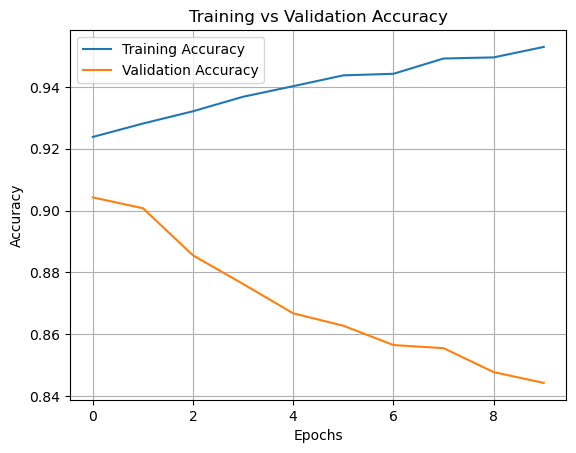

In [36]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()